In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_concluidos = pd.read_csv("indicadores_CT.xlsx - concluidos.csv", sep=",", encoding="utf-8")
df_cancelados = pd.read_csv("indicadores_CT.xlsx - cancelados.csv", sep=",", encoding="utf-8")

In [35]:
# somente registros do curso "ENGENHARIA METALÚRGICA"
df_concluidos_metalurgica = df_concluidos[df_concluidos["curso"] == "ENGENHARIA METALÚRGICA"]
df_cancelados_metalurgica = df_cancelados[df_cancelados["curso"] == "ENGENHARIA METALÚRGICA"]

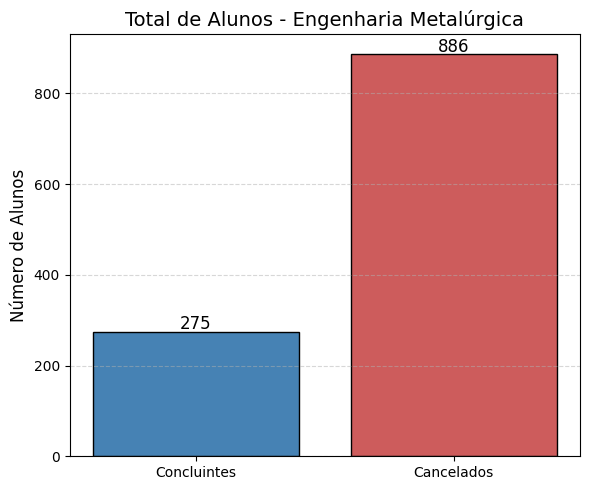

In [4]:
# Total de alunos
# Contar total de alunos em cada grupo
total_concluidos = len(df_concluidos_metalurgica)
total_cancelados = len(df_cancelados_metalurgica)

# Dados para o gráfico
grupos = ['Concluintes', 'Cancelados']
totais = [total_concluidos, total_cancelados]

# Criar gráfico de barras
plt.figure(figsize=(6, 5))
plt.bar(grupos, totals := [total_concluidos, total_cancelados], color=['steelblue', 'indianred'], edgecolor='black')

# Adicionar rótulos numéricos nas barras
for i, total in enumerate(totals):
    plt.text(i, total + 5, str(total), ha='center', fontsize=12)

plt.title("Total de Alunos - Engenharia Metalúrgica", fontsize=14)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

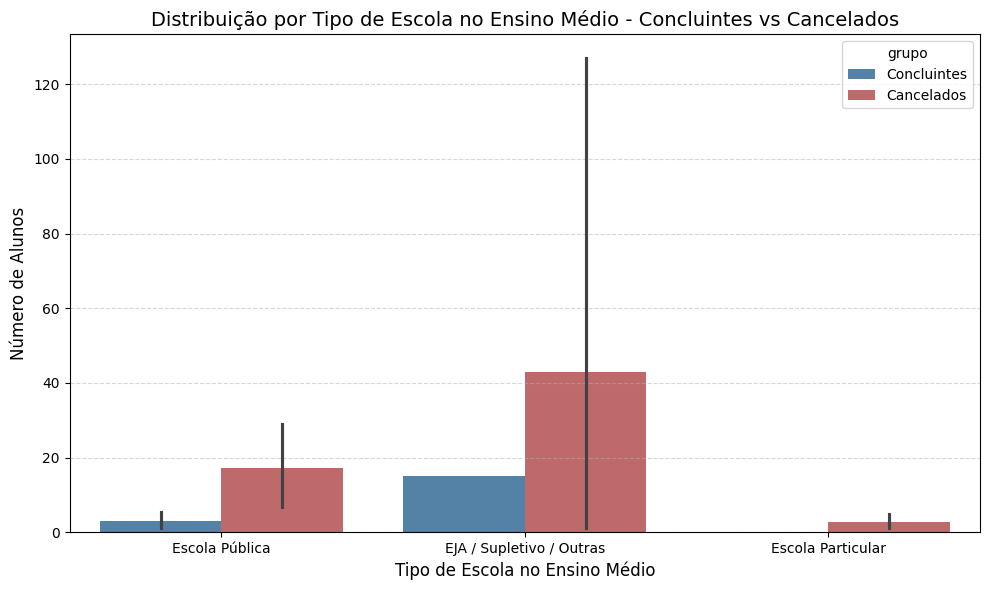

In [5]:
# Distribuição por Tipo de Escola
# Agrupar por 'cota' e 'segundo_grau_tipo_escola'
agrupamento_concluintes = df_concluidos_metalurgica.groupby(
    ['cota', 'segundo_grau_tipo_escola']
).size().reset_index(name='total')
agrupamento_concluintes['grupo'] = 'Concluintes'

agrupamento_cancelados = df_cancelados_metalurgica.groupby(
    ['cota', 'segundo_grau_tipo_escola']
).size().reset_index(name='total')
agrupamento_cancelados['grupo'] = 'Cancelados'

# Concatenar os dois agrupamentos
df_agrupado = pd.concat([agrupamento_concluintes, agrupamento_cancelados], ignore_index=True)

# Tratar valores ausentes
df_agrupado['segundo_grau_tipo_escola'] = df_agrupado['segundo_grau_tipo_escola'].fillna("Não Informado")

# Mapeamento para rótulos legíveis
mapa_escola = {
    0.0: "Escola Particular",
    1.0: "Escola Pública",
    2.0: "EJA / Supletivo / Outras",
    "Não Informado": "Não Informado"
}

# Substituir códigos pelo texto descritivo
df_agrupado['tipo_escola_legivel'] = df_agrupado['segundo_grau_tipo_escola'].replace(mapa_escola)

# Plotar gráfico de barras com tipo de escola
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agrupado, x='tipo_escola_legivel', y='total', hue='grupo',
            palette=['steelblue', 'indianred'])

plt.title("Distribuição por Tipo de Escola no Ensino Médio - Concluintes vs Cancelados", fontsize=14)
plt.xlabel("Tipo de Escola no Ensino Médio", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

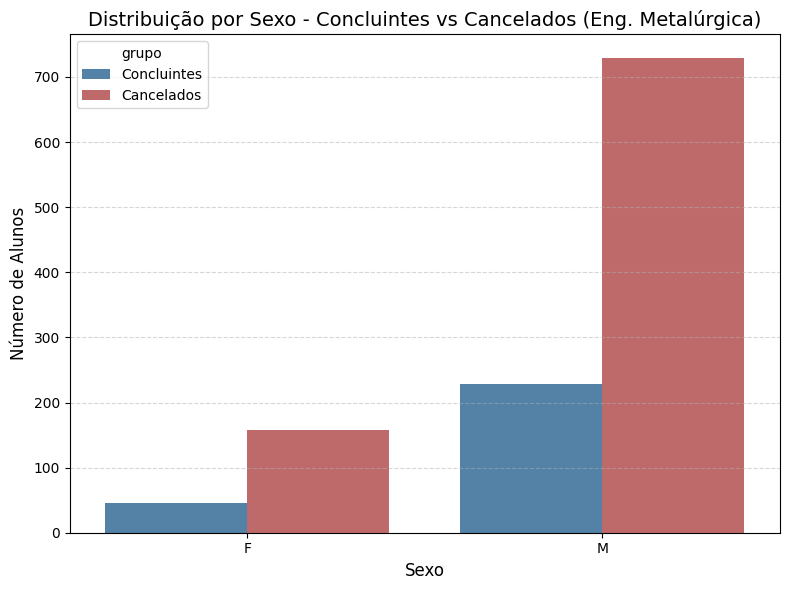

In [13]:
# Distribuição por sexo
# Filtrar apenas Engenharia Metalúrgica
df_concluidos_metalurgica = df_concluidos[df_concluidos["curso"] == "ENGENHARIA METALÚRGICA"]
df_cancelados_metalurgica = df_cancelados[df_cancelados["curso"] == "ENGENHARIA METALÚRGICA"]

# Agrupar por sexo
concluidos_sexo = df_concluidos_metalurgica.groupby("sexo").size().reset_index(name="total")
concluidos_sexo["grupo"] = "Concluintes"

cancelados_sexo = df_cancelados_metalurgica.groupby("sexo").size().reset_index(name="total")
cancelados_sexo["grupo"] = "Cancelados"

# Combinar os dois
df_sexo = pd.concat([concluidos_sexo, cancelados_sexo], ignore_index=True)
df_sexo["sexo"] = df_sexo["sexo"].fillna("Não Informado")

# Plotar gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=df_sexo, x="sexo", y="total", hue="grupo", palette=["steelblue", "indianred"])

plt.title("Distribuição por Sexo - Concluintes vs Cancelados (Eng. Metalúrgica)", fontsize=14)
plt.xlabel("Sexo", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

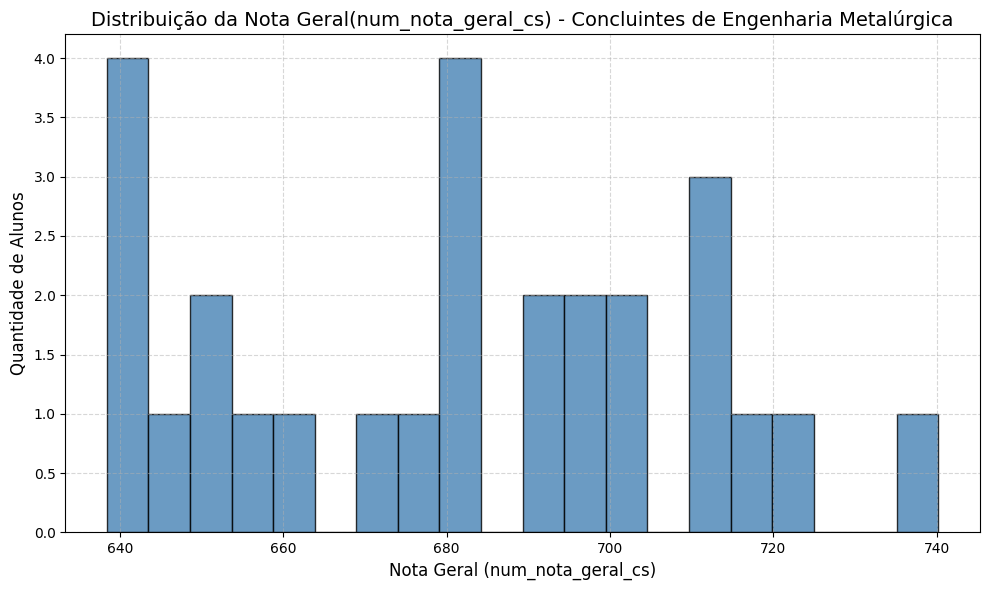

In [6]:
# Histograma da nota geral(num_nota_geral_cs) para concluintes
plt.figure(figsize=(10, 6))
plt.hist(df_concluidos_metalurgica["num_nota_geral_cs"].dropna(), bins=20, color='steelblue', edgecolor='black', alpha=0.8)
plt.title("Distribuição da Nota Geral(num_nota_geral_cs) - Concluintes de Engenharia Metalúrgica", fontsize=14)
plt.xlabel("Nota Geral (num_nota_geral_cs)", fontsize=12)
plt.ylabel("Quantidade de Alunos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

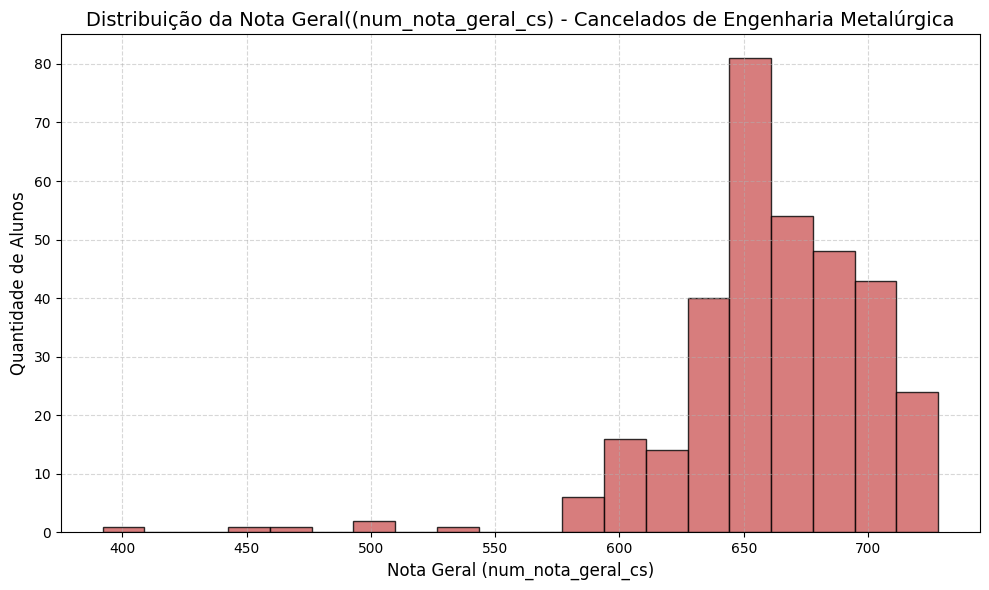

In [7]:
# Histograma para Cancelados de Engenharia Metalúrgica
plt.figure(figsize=(10, 6))
plt.hist(df_cancelados_metalurgica["num_nota_geral_cs"].dropna(), bins=20, color='indianred', edgecolor='black', alpha=0.8)
plt.title("Distribuição da Nota Geral((num_nota_geral_cs) - Cancelados de Engenharia Metalúrgica", fontsize=14)
plt.xlabel("Nota Geral (num_nota_geral_cs)", fontsize=12)
plt.ylabel("Quantidade de Alunos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

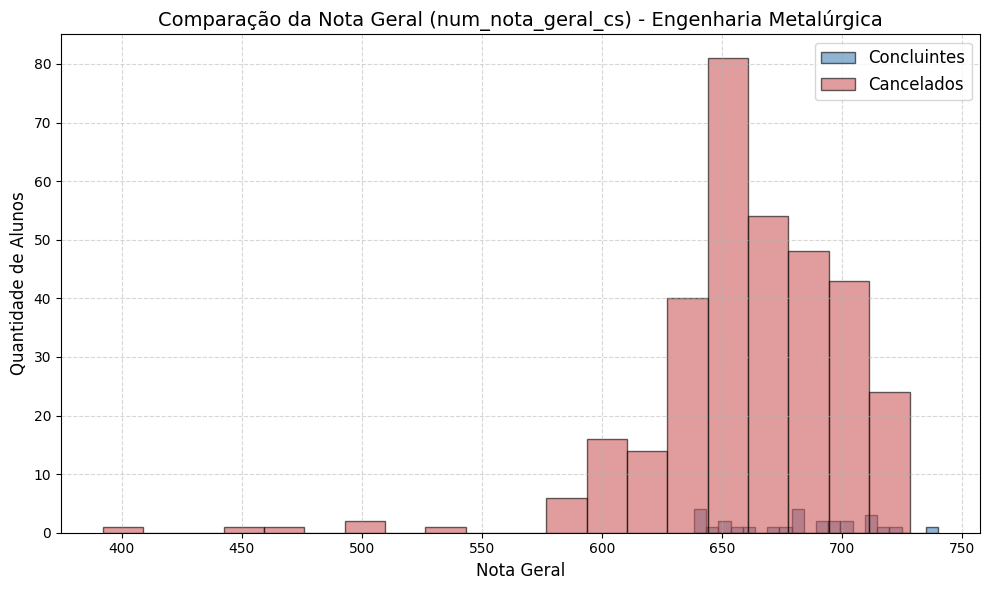

In [8]:
# Comparação de Histogramas (Concluintes vs Cancelados) (num_nota_geral_cs)
plt.figure(figsize=(10, 6))

# Histograma de Concluintes
plt.hist(df_concluidos_metalurgica["num_nota_geral_cs"].dropna(), bins=20,
         alpha=0.6, label="Concluintes", color="steelblue", edgecolor="black")

# Histograma de Cancelados
plt.hist(df_cancelados_metalurgica["num_nota_geral_cs"].dropna(), bins=20,
         alpha=0.6, label="Cancelados", color="indianred", edgecolor="black")

# Configurações do gráfico
plt.title("Comparação da Nota Geral (num_nota_geral_cs) - Engenharia Metalúrgica", fontsize=14)
plt.xlabel("Nota Geral", fontsize=12)
plt.ylabel("Quantidade de Alunos", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-566071167.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ira_concluintes.dropna(), ira_cancelados.dropna()],


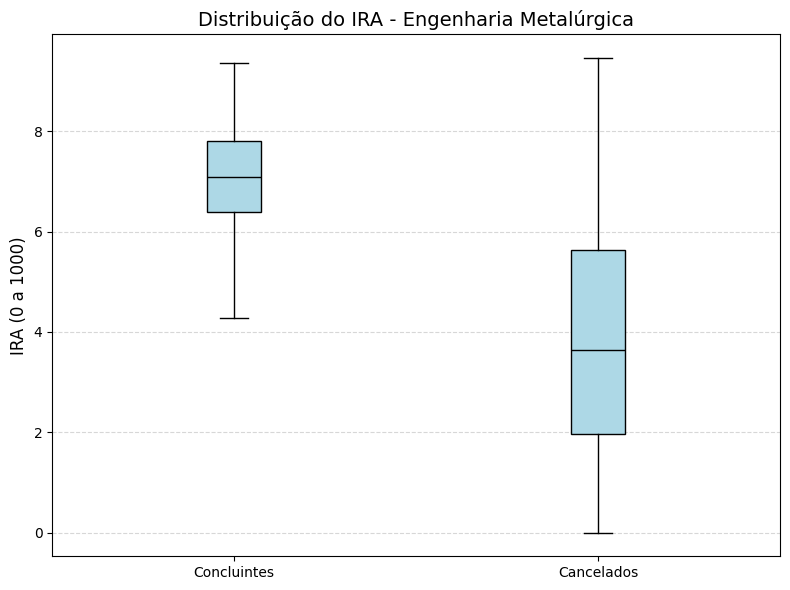

In [9]:
# Boxplot de ira_ind
# Garantir cópia independente e conversão correta para float
ira_concluintes = df_concluidos_metalurgica["ira_ind"].astype(str).str.replace(",", ".").astype(float)
ira_cancelados = df_cancelados_metalurgica["ira_ind"].astype(str).str.replace(",", ".").astype(float)

# Boxplot com dados corrigidos
plt.figure(figsize=(8, 6))
plt.boxplot([ira_concluintes.dropna(), ira_cancelados.dropna()],
            labels=["Concluintes", "Cancelados"],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='black'))

plt.title("Distribuição do IRA - Engenharia Metalúrgica", fontsize=14)
plt.ylabel("IRA (0 a 1000)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A mediana é mais alta para concluintes, tem maior dispersão e valores mais baixos entre os cancelados.

<Figure size 1000x600 with 0 Axes>

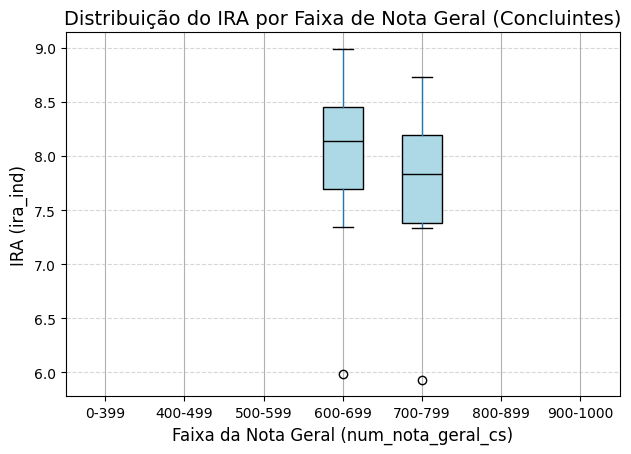

In [10]:
# Boxplot de ira por nota geral para concluintes
# Garantir cópias com conversão numérica
concluintes = df_concluidos_metalurgica.copy()
concluintes["ira_ind"] = concluintes["ira_ind"].astype(str).str.replace(",", ".").astype(float)
concluintes["num_nota_geral_cs"] = concluintes["num_nota_geral_cs"].astype(str).str.replace(",", ".").astype(float)

# Criar faixas de nota geral (bins de 100 pontos)
bins = [0, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-1000']
concluintes["faixa_nota_geral"] = pd.cut(concluintes["num_nota_geral_cs"], bins=bins, labels=labels)

# Plotar boxplot do IRA por faixa de nota geral
plt.figure(figsize=(10, 6))
concluintes.boxplot(column="ira_ind", by="faixa_nota_geral", patch_artist=True,
                    boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))

plt.title("Distribuição do IRA por Faixa de Nota Geral (Concluintes)", fontsize=14)
plt.suptitle("")  # remover título automático do pandas
plt.xlabel("Faixa da Nota Geral (num_nota_geral_cs)", fontsize=12)
plt.ylabel("IRA (ira_ind)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

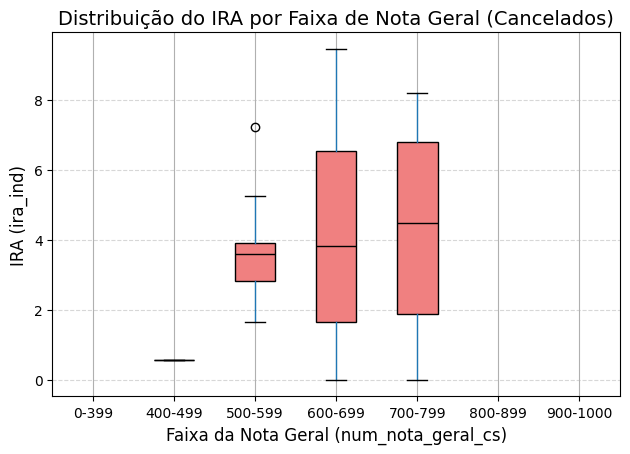

In [11]:
# Boxplot de ira por nota geral para cancelados
# Garantir cópia e conversões numéricas seguras para os cancelados
cancelados = df_cancelados_metalurgica.copy()
cancelados["ira_ind"] = cancelados["ira_ind"].astype(str).str.replace(",", ".").astype(float)
cancelados["num_nota_geral_cs"] = cancelados["num_nota_geral_cs"].astype(str).str.replace(",", ".").astype(float)

# Definir as mesmas faixas (bins) de nota geral
bins = [0, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-1000']
cancelados["faixa_nota_geral"] = pd.cut(cancelados["num_nota_geral_cs"], bins=bins, labels=labels)

# Garantir que todas as categorias apareçam no gráfico
cancelados["faixa_nota_geral"] = pd.Categorical(cancelados["faixa_nota_geral"], categories=labels, ordered=True)

# Plotar o boxplot para cancelados
plt.figure(figsize=(10, 6))
cancelados.boxplot(column="ira_ind", by="faixa_nota_geral", patch_artist=True,
                   boxprops=dict(facecolor='lightcoral'), medianprops=dict(color='black'))

plt.title("Distribuição do IRA por Faixa de Nota Geral (Cancelados)", fontsize=14)
plt.suptitle("")  # remover título automático do pandas
plt.xlabel("Faixa da Nota Geral (num_nota_geral_cs)", fontsize=12)
plt.ylabel("IRA (ira_ind)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-2104264212.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_tipo_ocorrencia, y="tipo_ocorrencia", x="total", palette="coolwarm")


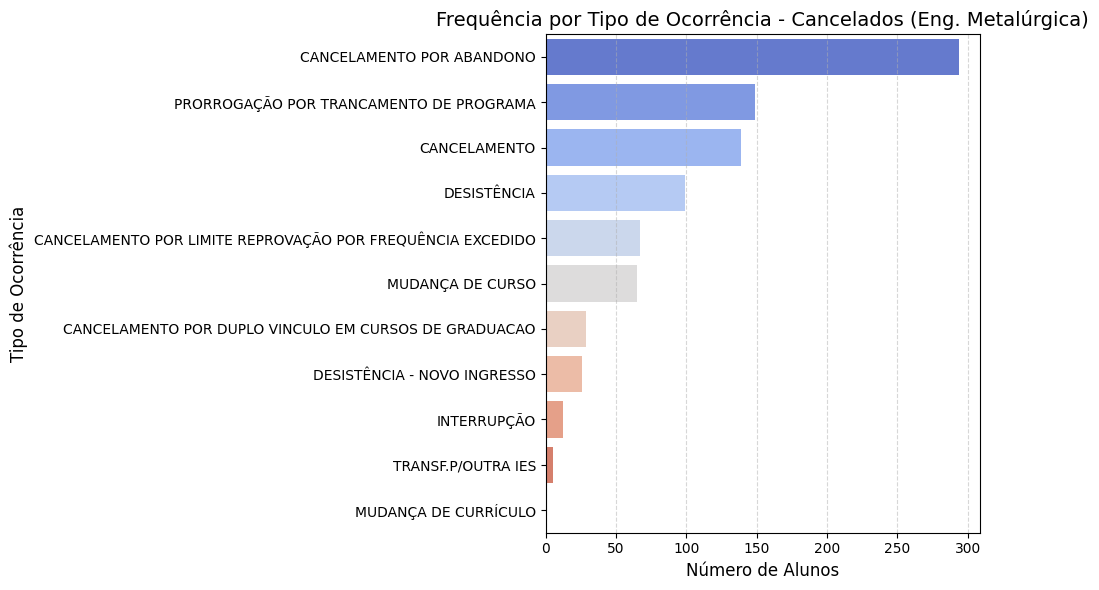

In [16]:
# Frequência Por Tipo De Ocorrência - Cancelados
# Agrupar somente por tipo de ocorrência
frequencia_tipo_ocorrencia = df_cancelados_metalurgica["tipo_ocorrencia"].fillna("Não Informado").value_counts().reset_index()
frequencia_tipo_ocorrencia.columns = ["tipo_ocorrencia", "total"]

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(data=frequencia_tipo_ocorrencia, y="tipo_ocorrencia", x="total", palette="coolwarm")

plt.title("Frequência por Tipo de Ocorrência - Cancelados (Eng. Metalúrgica)", fontsize=14)
plt.xlabel("Número de Alunos", fontsize=12)
plt.ylabel("Tipo de Ocorrência", fontsize=12)
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

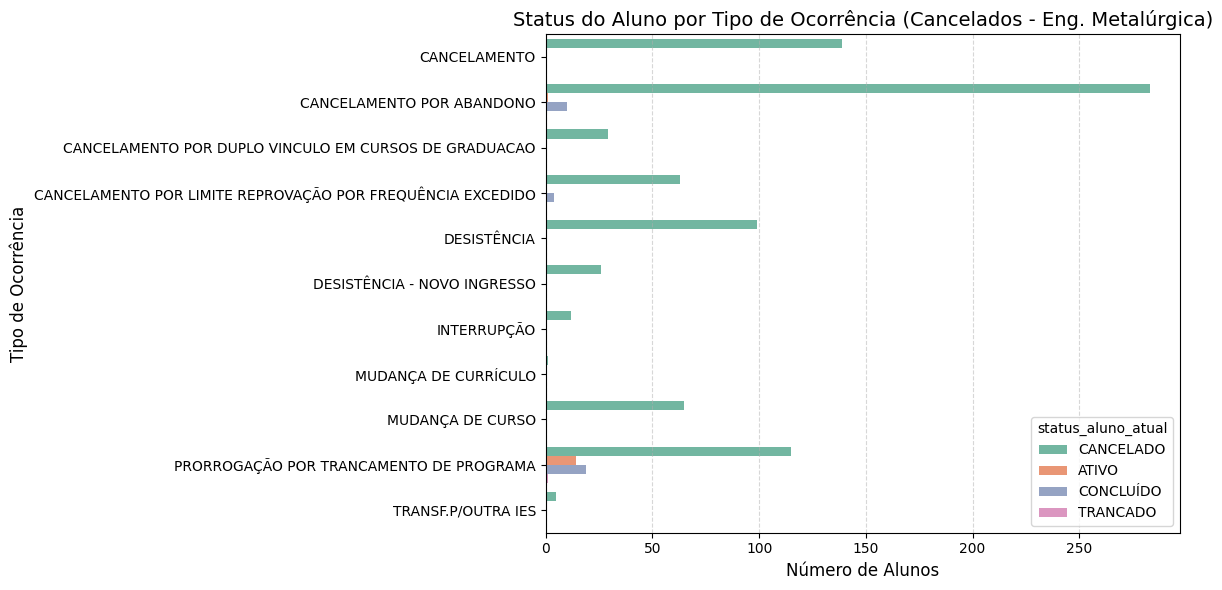

In [17]:
# Status aluno por tipo de ocorrência
# Filtrar somente Engenharia Metalúrgica
df_cancelados_metalurgica = df_cancelados[df_cancelados["curso"] == "ENGENHARIA METALÚRGICA"].copy()

# Preencher valores ausentes com texto padrão
df_cancelados_metalurgica["status_aluno_atual"] = df_cancelados_metalurgica["status_aluno_atual"].fillna("Não Informado")
df_cancelados_metalurgica["tipo_ocorrencia"] = df_cancelados_metalurgica["tipo_ocorrencia"].fillna("Não Informado")

# Agrupar por tipo de ocorrência e status atual
status_por_tipo = df_cancelados_metalurgica.groupby(
    ["tipo_ocorrencia", "status_aluno_atual"]
).size().reset_index(name="total")

# Plotar gráfico de barras horizontais
plt.figure(figsize=(12, 6))
sns.barplot(data=status_por_tipo, y="tipo_ocorrencia", x="total", hue="status_aluno_atual", palette="Set2")

plt.title("Status do Aluno por Tipo de Ocorrência (Cancelados - Eng. Metalúrgica)", fontsize=14)
plt.ylabel("Tipo de Ocorrência", fontsize=12)
plt.xlabel("Número de Alunos", fontsize=12)
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

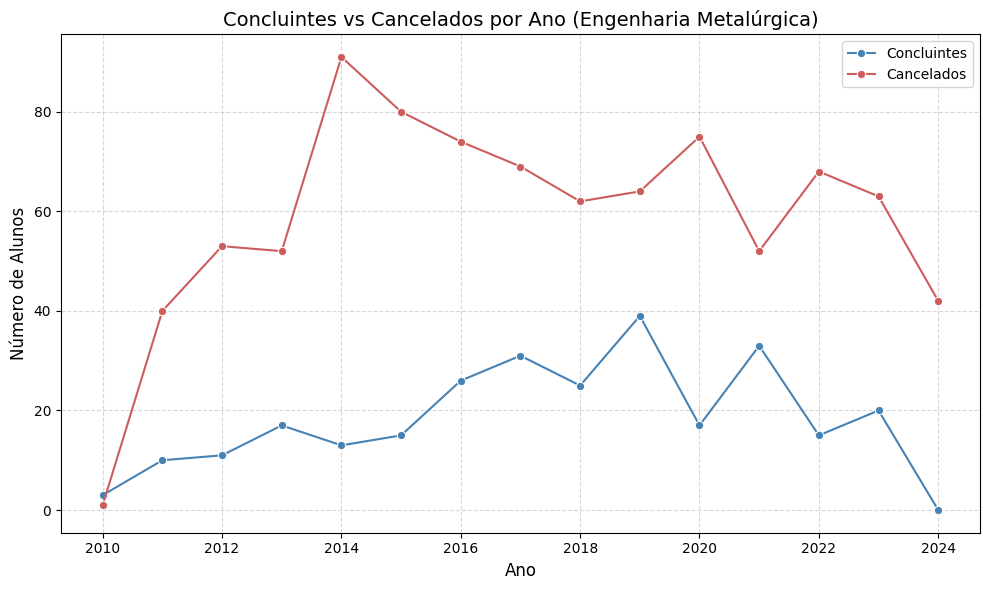

In [18]:
# Concluintes e cancelados por ano a partir de 2010
# Filtrar a partir de 2010
cancelados_filtrados = df_cancelados_metalurgica[df_cancelados_metalurgica["ano_referencia"] >= 2010].copy()
concluidos_filtrados = df_concluidos_metalurgica[df_concluidos_metalurgica["ano_conclusao"] >= 2010].copy()

# Contagem por ano
cancelados_por_ano = cancelados_filtrados["ano_referencia"].value_counts().sort_index().reset_index()
cancelados_por_ano.columns = ["ano", "cancelados"]

concluidos_por_ano = concluidos_filtrados["ano_conclusao"].value_counts().sort_index().reset_index()
concluidos_por_ano.columns = ["ano", "concluidos"]

# Mesclar e preencher valores ausentes
comparativo_ano_final = pd.merge(concluidos_por_ano, cancelados_por_ano, on="ano", how="outer").fillna(0)
comparativo_ano_final = comparativo_ano_final.sort_values("ano")
comparativo_ano_final["ano"] = comparativo_ano_final["ano"].astype(int)

# Plotar o gráfico final
plt.figure(figsize=(10, 6))
sns.lineplot(data=comparativo_ano_final, x="ano", y="concluidos", marker="o", label="Concluintes", color="steelblue")
sns.lineplot(data=comparativo_ano_final, x="ano", y="cancelados", marker="o", label="Cancelados", color="indianred")

plt.title("Concluintes vs Cancelados por Ano (Engenharia Metalúrgica)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-870962173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["ira_ind"] = df_concluidos_metalurgica["ira_ind"].astype(str).str.replace(",", ".").astype(float)


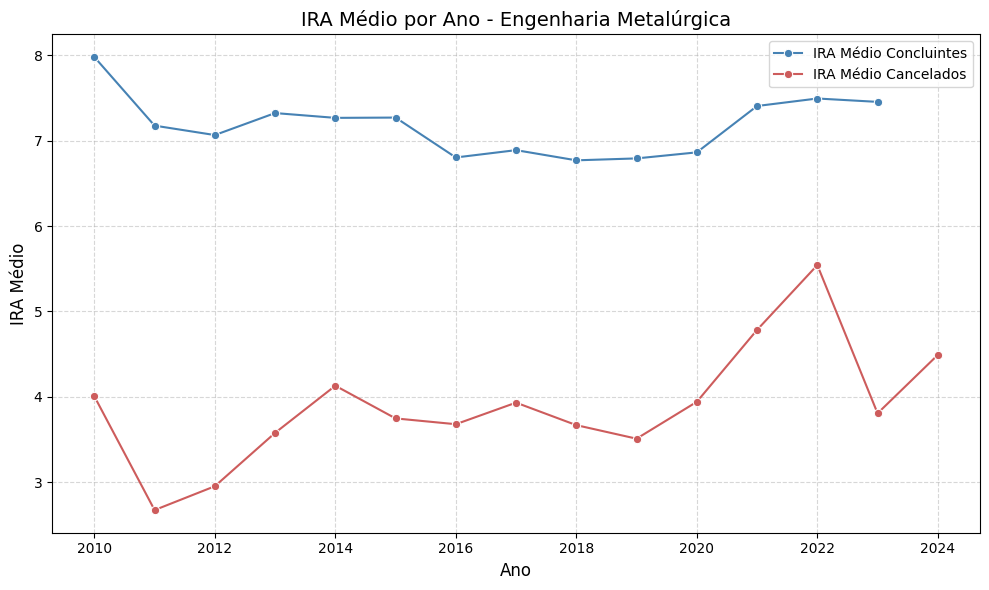

In [20]:
# Ira médio de cancelados e concluintes por ano
# Converter 'ira_ind' para float (tratando vírgulas)
df_cancelados_metalurgica["ira_ind"] = df_cancelados_metalurgica["ira_ind"].astype(str).str.replace(",", ".").astype(float)
df_concluidos_metalurgica["ira_ind"] = df_concluidos_metalurgica["ira_ind"].astype(str).str.replace(",", ".").astype(float)

# Filtrar a partir de 2010
cancelados_ira = df_cancelados_metalurgica[df_cancelados_metalurgica["ano_referencia"] >= 2010]
concluidos_ira = df_concluidos_metalurgica[df_concluidos_metalurgica["ano_conclusao"] >= 2010]

# Calcular médias
ira_cancelados_ano = cancelados_ira.groupby("ano_referencia")["ira_ind"].mean().reset_index()
ira_cancelados_ano.columns = ["ano", "ira_cancelados"]

ira_concluidos_ano = concluidos_ira.groupby("ano_conclusao")["ira_ind"].mean().reset_index()
ira_concluidos_ano.columns = ["ano", "ira_concluidos"]

# Juntar
ira_comparativo = pd.merge(ira_concluidos_ano, ira_cancelados_ano, on="ano", how="outer").sort_values("ano")

plt.figure(figsize=(10, 6))
sns.lineplot(data=ira_comparativo, x="ano", y="ira_concluidos", marker="o", label="IRA Médio Concluintes", color="steelblue")
sns.lineplot(data=ira_comparativo, x="ano", y="ira_cancelados", marker="o", label="IRA Médio Cancelados", color="indianred")

plt.title("IRA Médio por Ano - Engenharia Metalúrgica", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("IRA Médio", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-21-2303270649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["segundo_grau_tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].fillna("Não Informado")
/tmp/ipython-input-21-2303270649.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].replace(mapa_escola)


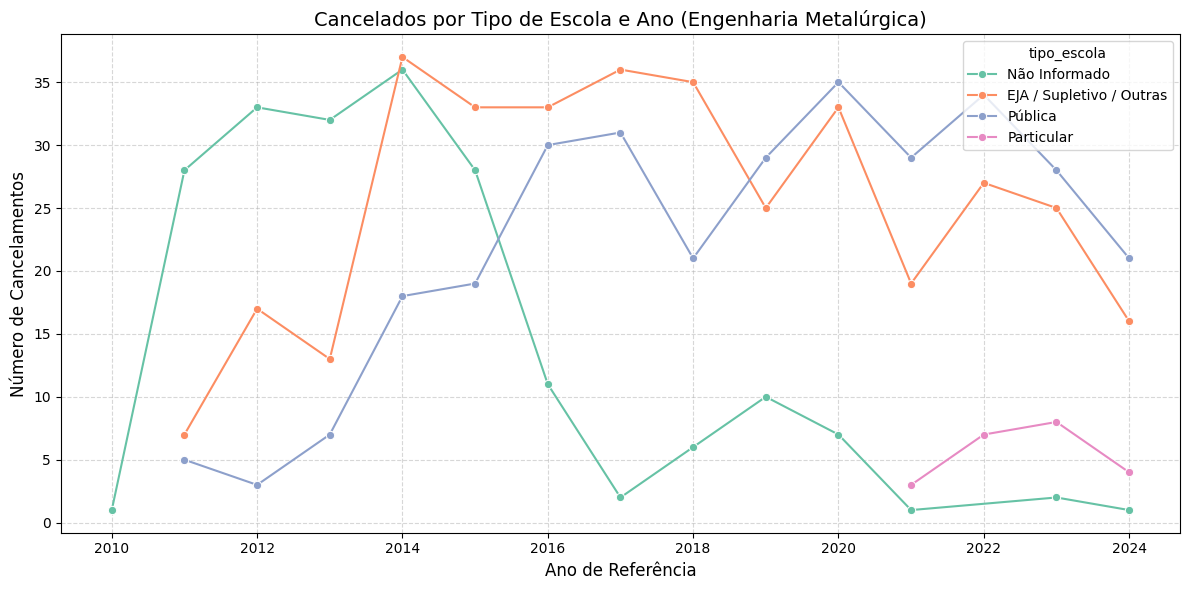

In [21]:
# Tipo de escola ao longo dos anos (Cancelados)
# Substituir NaN e converter códigos
df_cancelados_metalurgica["segundo_grau_tipo_escola"] = df_cancelados_metalurgica["segundo_grau_tipo_escola"].fillna("Não Informado")
df_concluidos_metalurgica["segundo_grau_tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].fillna("Não Informado")

mapa_escola = {
    0.0: "Particular",
    1.0: "Pública",
    2.0: "EJA / Supletivo / Outras",
    "Não Informado": "Não Informado"
}

df_cancelados_metalurgica["tipo_escola"] = df_cancelados_metalurgica["segundo_grau_tipo_escola"].replace(mapa_escola)
df_concluidos_metalurgica["tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].replace(mapa_escola)

# Contagem por ano e tipo de escola
escola_cancelados = df_cancelados_metalurgica[df_cancelados_metalurgica["ano_referencia"] >= 2010].groupby(["ano_referencia", "tipo_escola"]).size().reset_index(name="total")
escola_concluidos = df_concluidos_metalurgica[df_concluidos_metalurgica["ano_conclusao"] >= 2010].groupby(["ano_conclusao", "tipo_escola"]).size().reset_index(name="total")

plt.figure(figsize=(12, 6))
sns.lineplot(data=escola_cancelados, x="ano_referencia", y="total", hue="tipo_escola", marker="o", palette="Set2")
plt.title("Cancelados por Tipo de Escola e Ano (Engenharia Metalúrgica)", fontsize=14)
plt.xlabel("Ano de Referência", fontsize=12)
plt.ylabel("Número de Cancelamentos", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-3606371514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["segundo_grau_tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].fillna("Não Informado")
/tmp/ipython-input-22-3606371514.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].replace(mapa_escola)


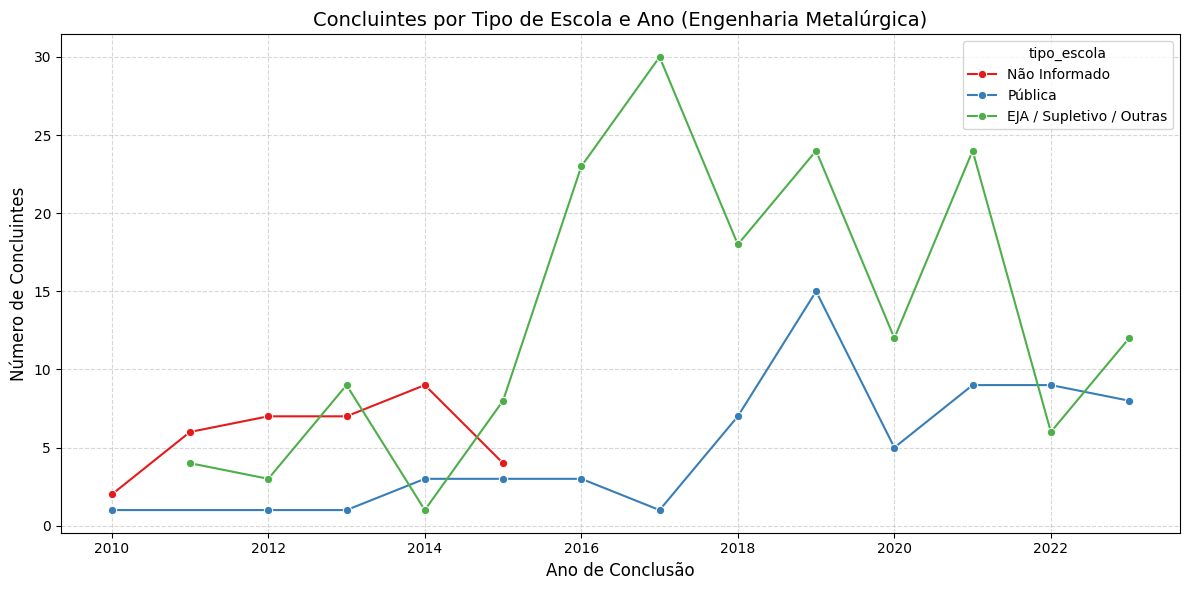

In [22]:
# Tipo de escola ao longo dos anos (Concluintes)
# Substituir NaN e converter códigos
df_cancelados_metalurgica["segundo_grau_tipo_escola"] = df_cancelados_metalurgica["segundo_grau_tipo_escola"].fillna("Não Informado")
df_concluidos_metalurgica["segundo_grau_tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].fillna("Não Informado")

mapa_escola = {
    0.0: "Particular",
    1.0: "Pública",
    2.0: "EJA / Supletivo / Outras",
    "Não Informado": "Não Informado"
}

df_cancelados_metalurgica["tipo_escola"] = df_cancelados_metalurgica["segundo_grau_tipo_escola"].replace(mapa_escola)
df_concluidos_metalurgica["tipo_escola"] = df_concluidos_metalurgica["segundo_grau_tipo_escola"].replace(mapa_escola)

# Contagem por ano e tipo de escola
escola_cancelados = df_cancelados_metalurgica[df_cancelados_metalurgica["ano_referencia"] >= 2010].groupby(["ano_referencia", "tipo_escola"]).size().reset_index(name="total")
escola_concluidos = df_concluidos_metalurgica[df_concluidos_metalurgica["ano_conclusao"] >= 2010].groupby(["ano_conclusao", "tipo_escola"]).size().reset_index(name="total")

plt.figure(figsize=(12, 6))
sns.lineplot(data=escola_concluidos, x="ano_conclusao", y="total", hue="tipo_escola", marker="o", palette="Set1")
plt.title("Concluintes por Tipo de Escola e Ano (Engenharia Metalúrgica)", fontsize=14)
plt.xlabel("Ano de Conclusão", fontsize=12)
plt.ylabel("Número de Concluintes", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-25-1160036719.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancelamentos_por_semestre, x="semestre", y="cancelamentos", palette="Reds")


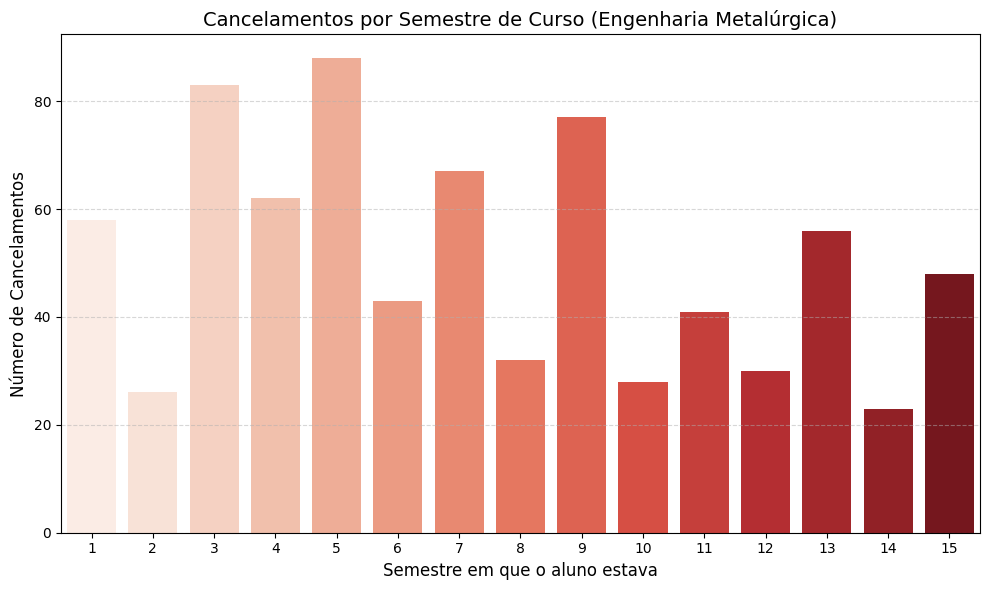

In [25]:
# Cancelamentos por Semestre de Curso
# Garantir que periodo_atual é numérico
df_cancelados_metalurgica["periodo_atual"] = pd.to_numeric(df_cancelados_metalurgica["periodo_atual"], errors='coerce')

# Filtrar somente semestres até o 15º
df_cancelados_validos = df_cancelados_metalurgica[df_cancelados_metalurgica["periodo_atual"] <= 15]

# Contar cancelamentos por semestre
cancelamentos_por_semestre = (
    df_cancelados_validos["periodo_atual"]
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
    .reset_index()
)
cancelamentos_por_semestre.columns = ["semestre", "cancelamentos"]

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=cancelamentos_por_semestre, x="semestre", y="cancelamentos", palette="Reds")

plt.title("Cancelamentos por Semestre de Curso (Engenharia Metalúrgica)", fontsize=14)
plt.xlabel("Semestre em que o aluno estava", fontsize=12)
plt.ylabel("Número de Cancelamentos", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Tentei fazer uma comparação de cancelados para quem entra no curso no primeiro semestre e no segundo semestre, mas os alunos so entram no primeiro semestre no arquivo.

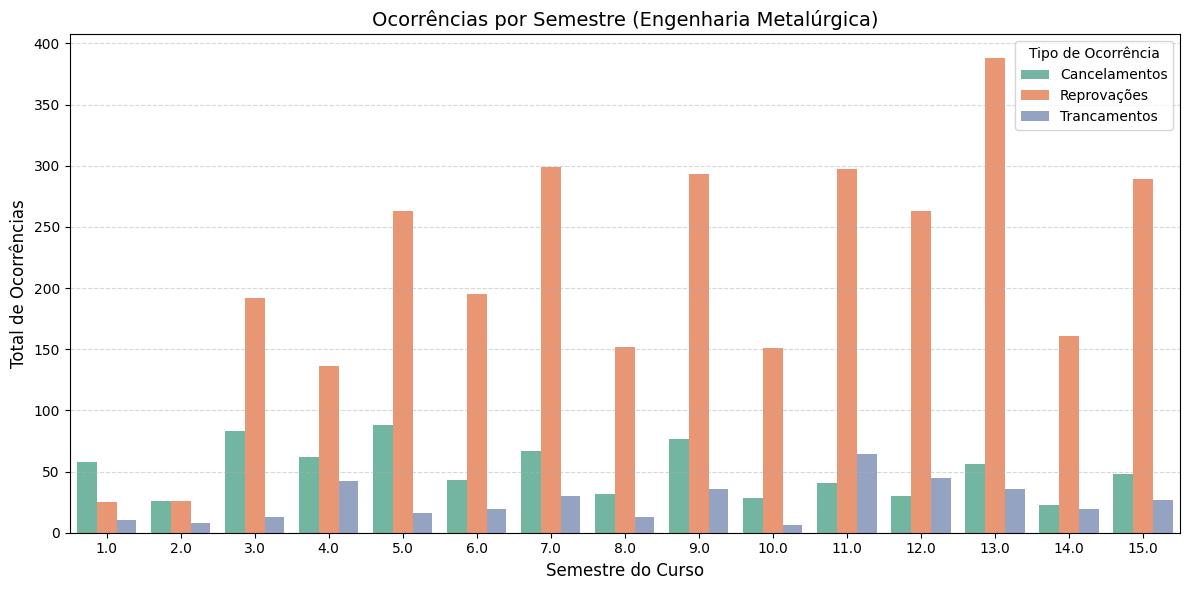

In [29]:
# Ocorrências por semestre
# Garantir que as colunas estão no tipo numérico
df_cancelados_metalurgica["periodo_atual"] = pd.to_numeric(df_cancelados_metalurgica["periodo_atual"], errors="coerce")
df_cancelados_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_cancelados_metalurgica["qtd_rep_nota"], errors="coerce")
df_cancelados_metalurgica["qtd_trancamento"] = pd.to_numeric(df_cancelados_metalurgica["qtd_trancamento"], errors="coerce")

# Filtrar até o 15º semestre
df_cancelados_filtrado = df_cancelados_metalurgica[df_cancelados_metalurgica["periodo_atual"] <= 15].copy()

# Agrupar por semestre: somar os totais
agrupado = df_cancelados_filtrado.groupby("periodo_atual").agg({
    "qtd_rep_nota": "sum",
    "qtd_trancamento": "sum",
    "periodo_atual": "count"  # número de cancelamentos
}).rename(columns={"periodo_atual": "cancelamentos"}).reset_index()

# Renomear coluna
agrupado = agrupado.rename(columns={"index": "semestre", "periodo_atual": "semestre"})

# Transformar em formato longo (tidy) para gráfico de barras agrupadas
agrupado_melt = agrupado.melt(id_vars="semestre",
                              value_vars=["cancelamentos", "qtd_rep_nota", "qtd_trancamento"],
                              var_name="tipo_ocorrencia",
                              value_name="total")

# Ajustar rótulos para legenda legível
agrupado_melt["tipo_ocorrencia"] = agrupado_melt["tipo_ocorrencia"].replace({
    "cancelamentos": "Cancelamentos",
    "qtd_rep_nota": "Reprovações",
    "qtd_trancamento": "Trancamentos"
})

# Plotar gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado_melt, x="semestre", y="total", hue="tipo_ocorrencia", palette="Set2")

plt.title("Ocorrências por Semestre (Engenharia Metalúrgica)", fontsize=14)
plt.xlabel("Semestre do Curso", fontsize=12)
plt.ylabel("Total de Ocorrências", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Tipo de Ocorrência")
plt.tight_layout()
plt.show()

/tmp/ipython-input-32-3813546053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_concluidos_metalurgica["qtd_rep_nota"], errors="coerce")
/tmp/ipython-input-32-3813546053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["qtd_trancamento"] = pd.to_numeric(df_concluidos_metalurgica["qtd_trancamento"], errors="coerce")
/tmp/ipython-input-32-3813546053.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

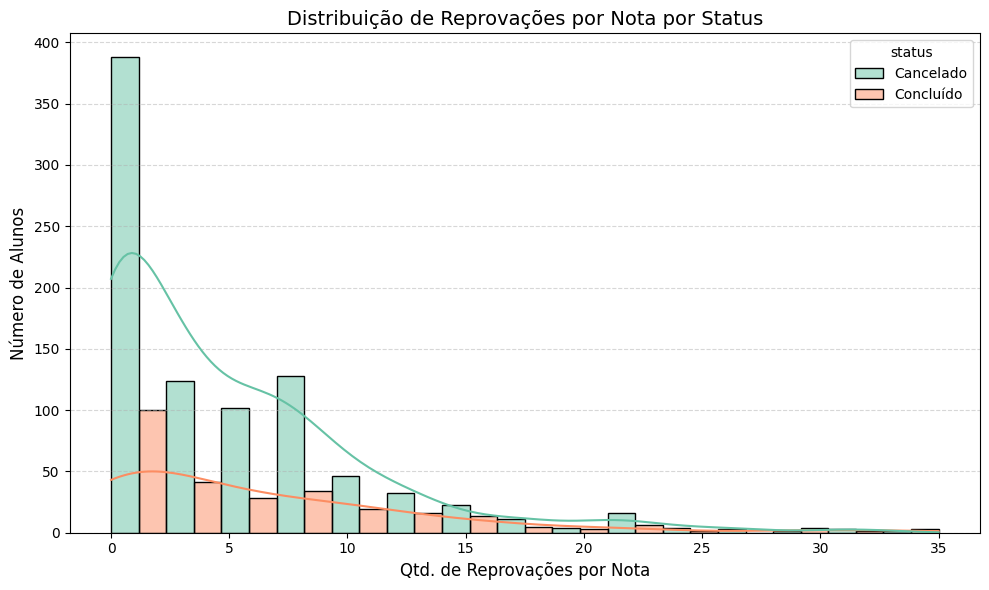

In [32]:
# Quantidade de reprovação por nota
# Garantir tipos numéricos
df_cancelados_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_cancelados_metalurgica["qtd_rep_nota"], errors="coerce")
df_cancelados_metalurgica["qtd_trancamento"] = pd.to_numeric(df_cancelados_metalurgica["qtd_trancamento"], errors="coerce")
df_cancelados_metalurgica["qtd_SUPRIMIDO"] = pd.to_numeric(df_cancelados_metalurgica["qtd_SUPRIMIDO"], errors="coerce")

df_concluidos_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_concluidos_metalurgica["qtd_rep_nota"], errors="coerce")
df_concluidos_metalurgica["qtd_trancamento"] = pd.to_numeric(df_concluidos_metalurgica["qtd_trancamento"], errors="coerce")
df_concluidos_metalurgica["qtd_SUPRIMIDO"] = pd.to_numeric(df_concluidos_metalurgica["qtd_SUPRIMIDO"], errors="coerce")

# Criar coluna de status
df_cancelados_metalurgica["status"] = "Cancelado"
df_concluidos_metalurgica["status"] = "Concluído"

# Juntar os dois dataframes
df_comparativo = pd.concat([df_cancelados_metalurgica, df_concluidos_metalurgica], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_comparativo, x="qtd_rep_nota", hue="status", bins=15, multiple="dodge", kde=True, palette="Set2")
plt.title("Distribuição de Reprovações por Nota por Status", fontsize=14)
plt.xlabel("Qtd. de Reprovações por Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-33-3350973534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_concluidos_metalurgica["qtd_rep_nota"], errors="coerce")
/tmp/ipython-input-33-3350973534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["qtd_trancamento"] = pd.to_numeric(df_concluidos_metalurgica["qtd_trancamento"], errors="coerce")
/tmp/ipython-input-33-3350973534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

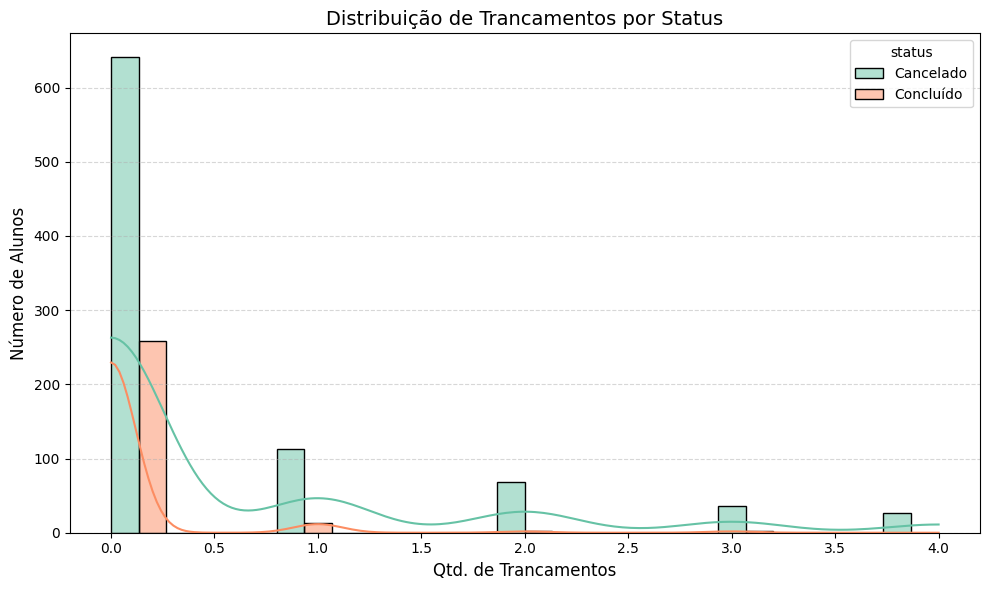

In [33]:
# Quantidade de trancamento
# Garantir tipos numéricos
df_cancelados_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_cancelados_metalurgica["qtd_rep_nota"], errors="coerce")
df_cancelados_metalurgica["qtd_trancamento"] = pd.to_numeric(df_cancelados_metalurgica["qtd_trancamento"], errors="coerce")
df_cancelados_metalurgica["qtd_SUPRIMIDO"] = pd.to_numeric(df_cancelados_metalurgica["qtd_SUPRIMIDO"], errors="coerce")

df_concluidos_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_concluidos_metalurgica["qtd_rep_nota"], errors="coerce")
df_concluidos_metalurgica["qtd_trancamento"] = pd.to_numeric(df_concluidos_metalurgica["qtd_trancamento"], errors="coerce")
df_concluidos_metalurgica["qtd_SUPRIMIDO"] = pd.to_numeric(df_concluidos_metalurgica["qtd_SUPRIMIDO"], errors="coerce")

# Criar coluna de status
df_cancelados_metalurgica["status"] = "Cancelado"
df_concluidos_metalurgica["status"] = "Concluído"

# Juntar os dois dataframes
df_comparativo = pd.concat([df_cancelados_metalurgica, df_concluidos_metalurgica], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_comparativo, x="qtd_trancamento", hue="status", bins=15, multiple="dodge", kde=True, palette="Set2")
plt.title("Distribuição de Trancamentos por Status", fontsize=14)
plt.xlabel("Qtd. de Trancamentos", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-34-211372218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_concluidos_metalurgica["qtd_rep_nota"], errors="coerce")
/tmp/ipython-input-34-211372218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concluidos_metalurgica["qtd_trancamento"] = pd.to_numeric(df_concluidos_metalurgica["qtd_trancamento"], errors="coerce")
/tmp/ipython-input-34-211372218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

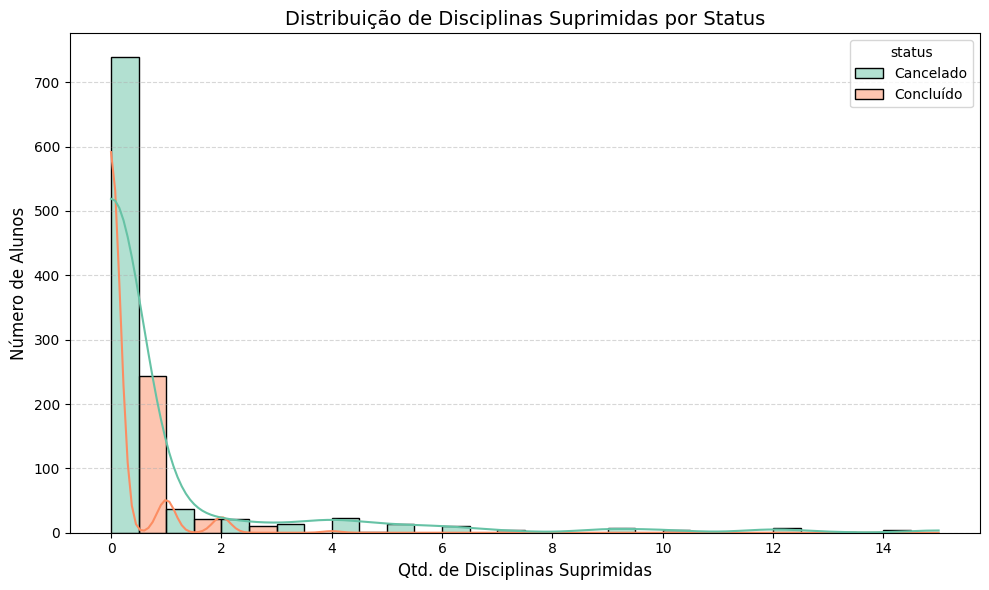

In [34]:
# Quantidade de suprimidos
# Garantir tipos numéricos
df_cancelados_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_cancelados_metalurgica["qtd_rep_nota"], errors="coerce")
df_cancelados_metalurgica["qtd_trancamento"] = pd.to_numeric(df_cancelados_metalurgica["qtd_trancamento"], errors="coerce")
df_cancelados_metalurgica["qtd_SUPRIMIDO"] = pd.to_numeric(df_cancelados_metalurgica["qtd_SUPRIMIDO"], errors="coerce")

df_concluidos_metalurgica["qtd_rep_nota"] = pd.to_numeric(df_concluidos_metalurgica["qtd_rep_nota"], errors="coerce")
df_concluidos_metalurgica["qtd_trancamento"] = pd.to_numeric(df_concluidos_metalurgica["qtd_trancamento"], errors="coerce")
df_concluidos_metalurgica["qtd_SUPRIMIDO"] = pd.to_numeric(df_concluidos_metalurgica["qtd_SUPRIMIDO"], errors="coerce")

# Criar coluna de status
df_cancelados_metalurgica["status"] = "Cancelado"
df_concluidos_metalurgica["status"] = "Concluído"

# Juntar os dois dataframes
df_comparativo = pd.concat([df_cancelados_metalurgica, df_concluidos_metalurgica], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_comparativo, x="qtd_SUPRIMIDO", hue="status", bins=15, multiple="dodge", kde=True, palette="Set2")
plt.title("Distribuição de Disciplinas Suprimidas por Status", fontsize=14)
plt.xlabel("Qtd. de Disciplinas Suprimidas", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()